In [4]:
import ee
import geemap
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [5]:
!pip install scienceplots
import scienceplots

In [2]:
!pip install xee
import xee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.2 MB/s eta 0:00:00


In [6]:
plt.style.use(['science', 'no-latex'])

In [7]:
ee.Authenticate()
ee.Initialize(project='ee-krivoguzdenis')

In [ ]:
roi_fc = ee.FeatureCollection('projects/ee-krivoguzdenis/assets/dnr')
roi = roi_fc.geometry()

In [9]:
nitrogen = (
    ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2")
    .filterDate('2019', '2025')
    .filterBounds(roi)
    .select(['NO2_column_number_density'],['no2'])
)

formaldehyde = (
    ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_HCHO")
    .filterDate('2019', '2025')
    .filterBounds(roi)
    .select(['tropospheric_HCHO_column_number_density'],['hcho'])
)

ozone = (
    ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_O3")
    .filterDate('2019', '2025')
    .filterBounds(roi)
    .select(['O3_column_number_density'],['o3'])
)

sulfur_dioxide = (
    ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_SO2")
    .filterDate('2019', '2025')
    .filterBounds(roi)
    .select(['SO2_column_number_density'],['so2'])
)

carbon_monoxide = (
    ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_CO")
    .filterDate('2019', '2025')
    .filterBounds(roi)
    .select(['CO_column_number_density'],['co'])
)

aerosol_index = (
    ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_AER_AI")
    .filterDate('2019', '2025')
    .filterBounds(roi)
    .select(['absorbing_aerosol_index'],['ai'])
)

In [10]:
nit_ds = xr.open_dataset(
    nitrogen,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.1,
    geometry = roi
)

formaldehyde_ds = xr.open_dataset(
    formaldehyde,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.1,
    geometry = roi
)

ozone_ds = xr.open_dataset(
    ozone,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.1,
    geometry = roi
)

sulfur_dioxide_ds = xr.open_dataset(
    sulfur_dioxide,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.1,
    geometry = roi
)

carbon_monoxide_ds = xr.open_dataset(
    carbon_monoxide,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.1,
    geometry = roi
)

aerosol_index_ds = xr.open_dataset(
    aerosol_index,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.1,
    geometry = roi
)

In [11]:
annual_no2 = nit_ds.resample(time = 'YE').mean('time')

annual_hcho = formaldehyde_ds.resample(time = 'YE').mean('time')

annual_o3 = ozone_ds.resample(time = 'YE').mean('time')

annual_so2 = sulfur_dioxide_ds.resample(time = 'YE').mean('time')

annual_co = carbon_monoxide_ds.resample(time = 'YE').mean('time')

annual_ai = aerosol_index_ds.resample(time = 'YE').mean('time')

In [ ]:
roi_gdf = geemap.ee_to_gdf(roi_fc)

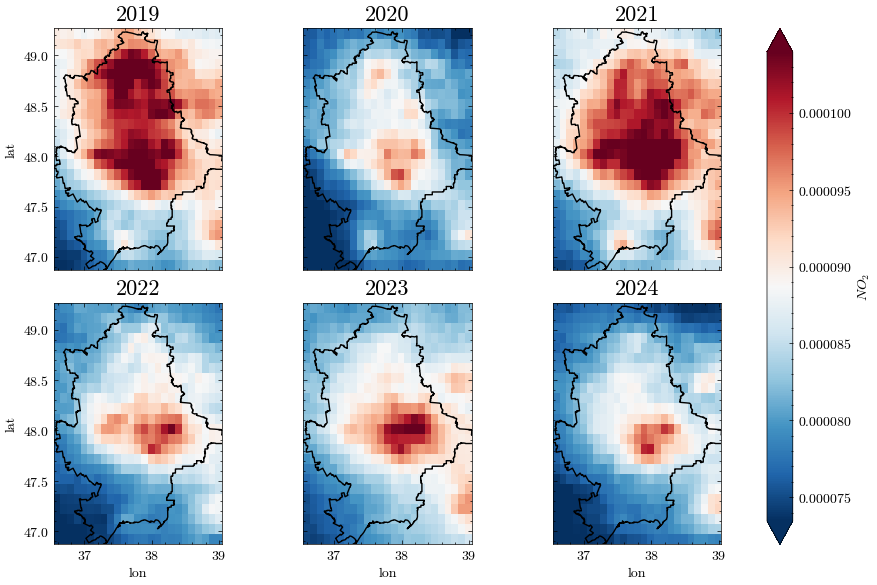

In [13]:
titles = ["2019", "2020", "2021", "2022", "2023", "2024"]

plot = annual_no2.no2.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=3,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$NO_2$'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

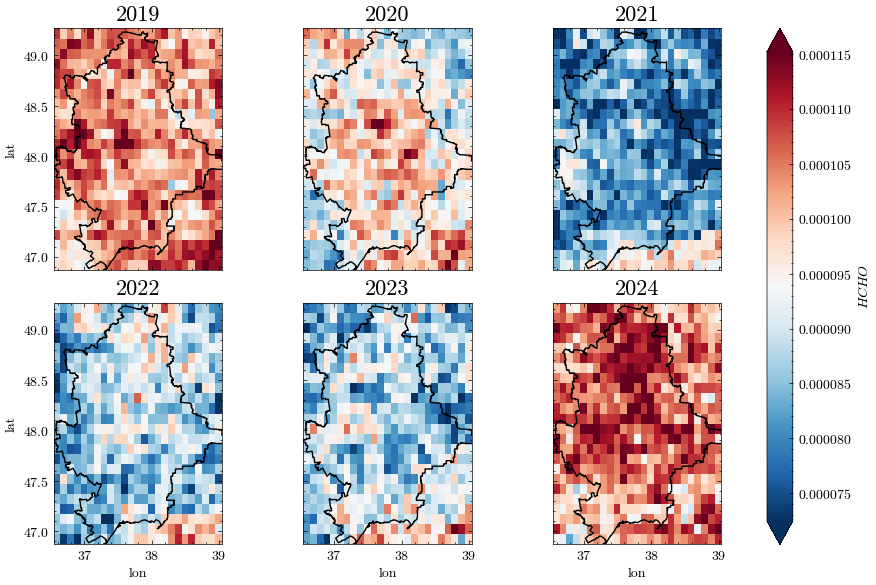

In [14]:
titles = ["2019", "2020", "2021", "2022", "2023", "2024"]

plot = annual_hcho.hcho.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=3,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$HCHO$'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

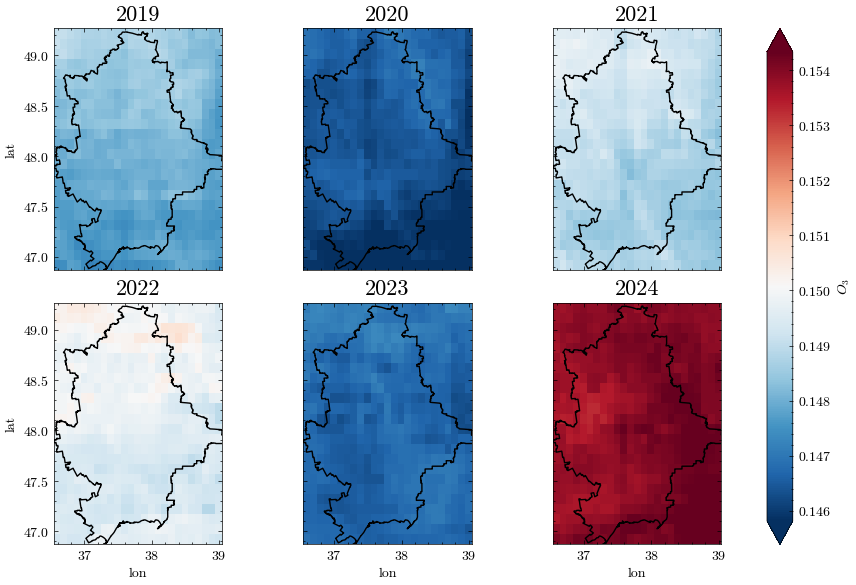

In [15]:
titles = ["2019", "2020", "2021", "2022", "2023", "2024"]

plot = annual_o3.o3.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=3,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$O_3$'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

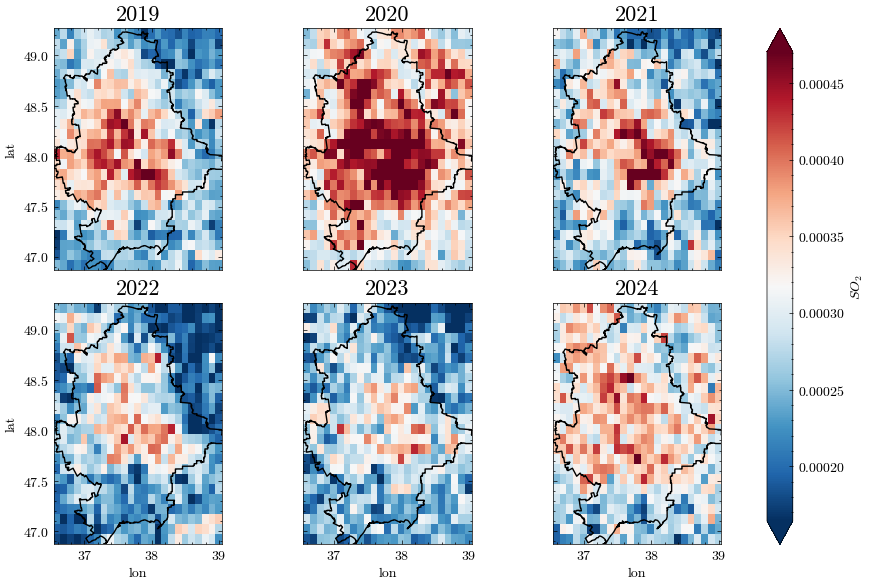

In [16]:
titles = ["2019", "2020", "2021", "2022", "2023", "2024"]

plot = annual_so2.so2.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=3,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$SO_2$'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

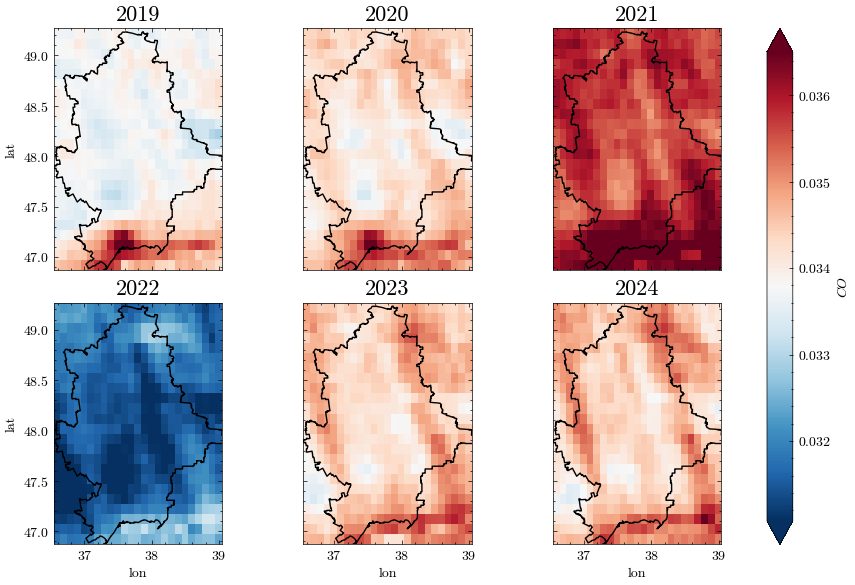

In [17]:
titles = ["2019", "2020", "2021", "2022", "2023", "2024"]

plot = annual_co.co.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=3,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$CO$'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

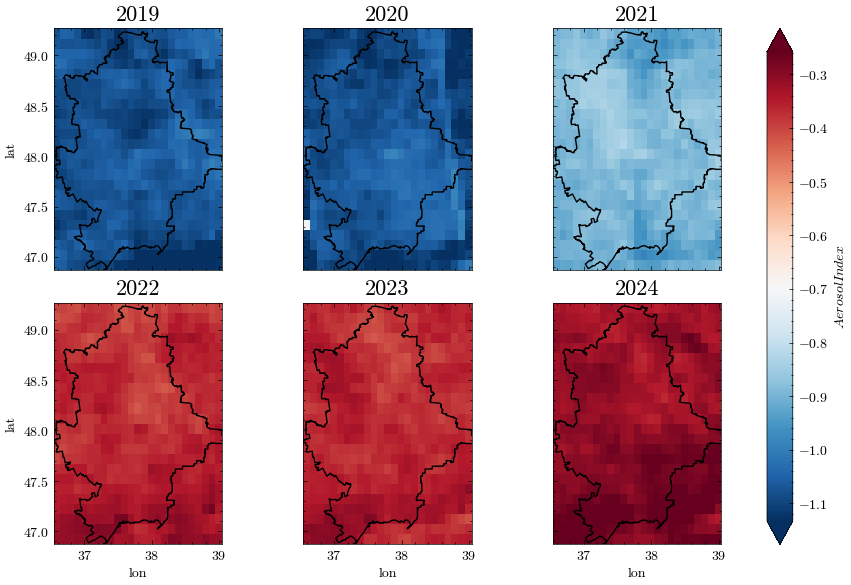

In [18]:
titles = ["2019", "2020", "2021", "2022", "2023", "2024"]

plot = annual_ai.ai.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=3,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': 'Aerosol Index'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

In [ ]:
annual_mean = annual.mean(dim = ['lon', 'lat'])

In [ ]:
annual_df = annual_mean.to_dataframe()

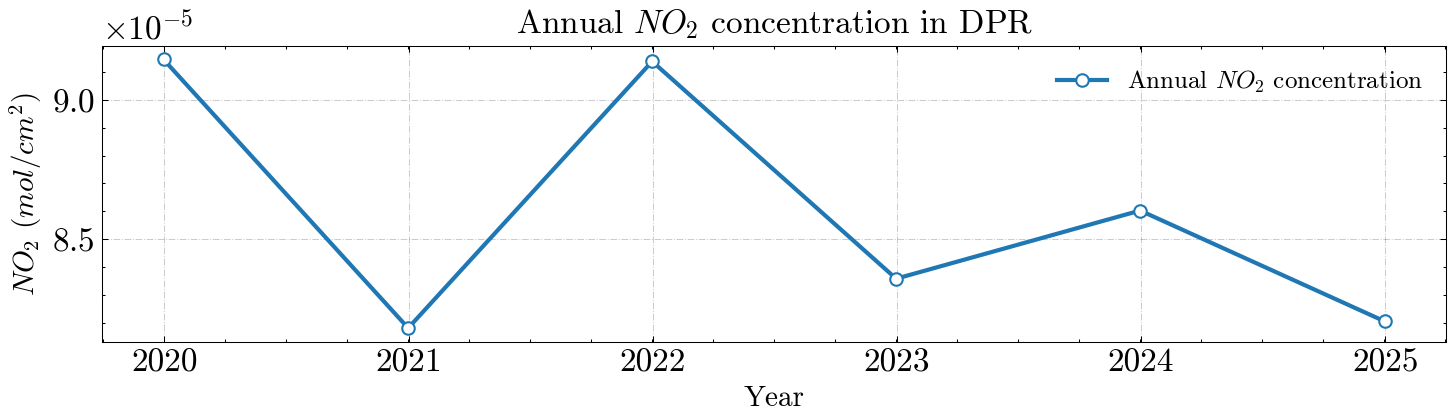

In [83]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(
    annual_df.index,
    annual_df['no2'],
    color='tab:blue',
    linestyle='-',
    linewidth=2,
    marker='o',
    markersize=6,
    markerfacecolor='white',
    markeredgecolor='tab:blue',
    label='Annual $NO_2$ concentration'
)


ax.set_title('Annual $NO_2$ concentration in DPR', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('$NO_2$ ($mol/cm^2$)', fontsize=14)


ax.grid(True, linestyle='-.', alpha=0.2)

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [20]:
monthly_nit = nit_ds.resample(time = 'ME').mean('time')
monthly_hcho = formaldehyde_ds.resample(time = 'ME').mean('time')
monthly_o3 = ozone_ds.resample(time = 'ME').mean('time')
monthly_so2 = sulfur_dioxide_ds.resample(time = 'ME').mean('time')
monthly_co = carbon_monoxide_ds.resample(time = 'ME').mean('time')
monthly_ai = aerosol_index_ds.resample(time = 'ME').mean('time')

In [21]:
monthly_mean_nit = monthly_nit.mean(dim = ['lon', 'lat'])
monthly_mean_hcho = monthly_hcho.mean(dim = ['lon', 'lat'])
monthly_mean_o3 = monthly_o3.mean(dim = ['lon', 'lat'])
monthly_mean_so2 = monthly_so2.mean(dim = ['lon', 'lat'])
monthly_mean_co = monthly_co.mean(dim = ['lon', 'lat'])
monthly_mean_ai = monthly_ai.mean(dim = ['lon', 'lat'])

In [22]:
monthly_nit_df = monthly_mean_nit.to_dataframe()
monthly_hcho_df = monthly_mean_hcho.to_dataframe()
monthly_o3_df = monthly_mean_o3.to_dataframe()
monthly_so2_df = monthly_mean_so2.to_dataframe()
monthly_co_df = monthly_mean_co.to_dataframe()
monthly_ai_df = monthly_mean_ai.to_dataframe()

<ipython-input-33-8b6431cec573>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12)


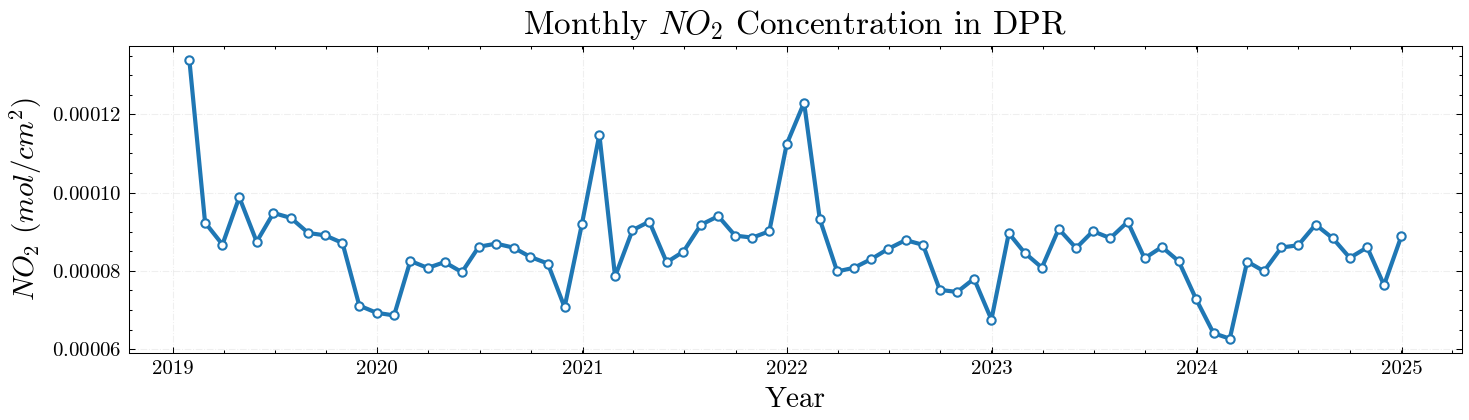

In [33]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(
    monthly_nit_df.index,
    monthly_nit_df['no2'],
    color='tab:blue',
    linestyle='-',
    linewidth=2,
    marker='o',
    markersize=4,
    markerfacecolor='white',
    markeredgecolor='tab:blue',
)


ax.set_title('Monthly $NO_2$ Concentration in DPR', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('$NO_2$ ($mol/cm^2$)', fontsize=14)


ax.grid(True, linestyle='-.', alpha=0.2)

ax.legend(fontsize=12)


plt.tight_layout()
plt.show()

<ipython-input-34-0d7108f382ec>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12)


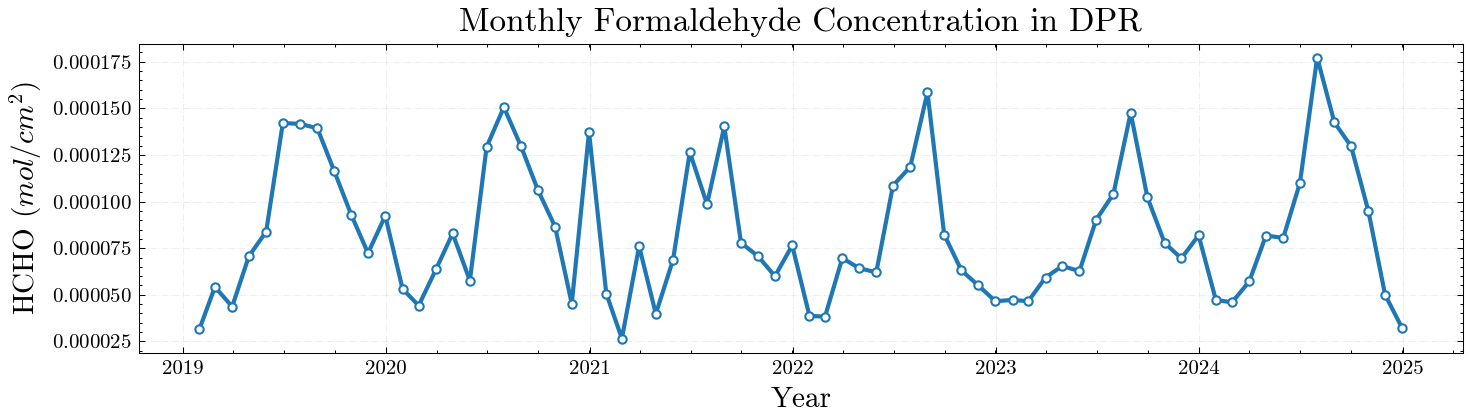

In [34]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(
    monthly_hcho_df.index,
    monthly_hcho_df['hcho'],
    color='tab:blue',
    linestyle='-',
    linewidth=2,
    marker='o',
    markersize=4,
    markerfacecolor='white',
    markeredgecolor='tab:blue',
)


ax.set_title('Monthly Formaldehyde Concentration in DPR', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('HCHO ($mol/cm^2$)', fontsize=14)

ax.grid(True, linestyle='-.', alpha=0.2)

ax.legend(fontsize=12)


plt.tight_layout()
plt.show()

<ipython-input-35-46b3cd5f0321>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12)


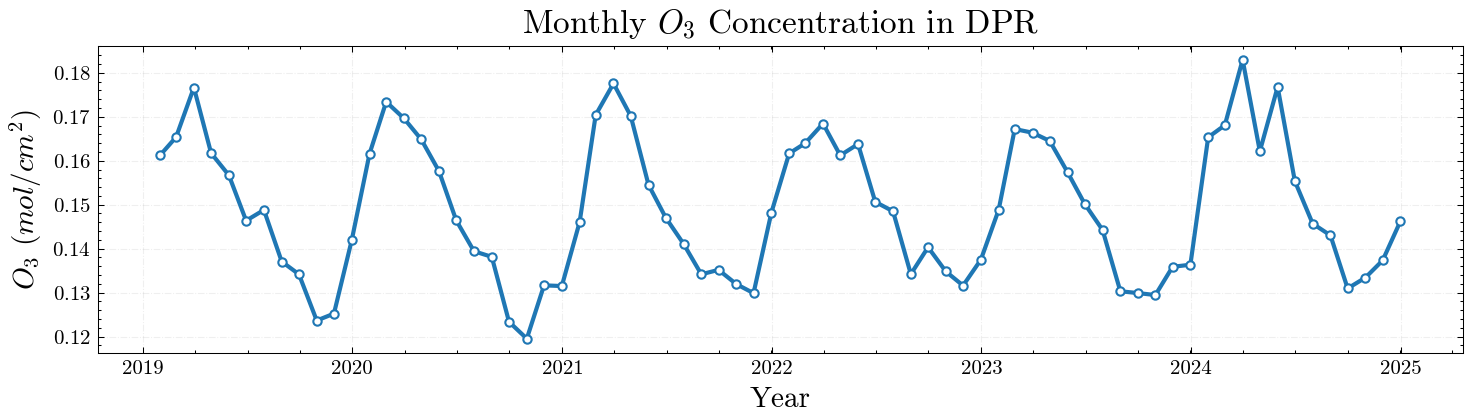

In [35]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(
    monthly_o3_df.index,
    monthly_o3_df['o3'],
    color='tab:blue',
    linestyle='-',
    linewidth=2,
    marker='o',
    markersize=4,
    markerfacecolor='white',
    markeredgecolor='tab:blue',
)

ax.set_title('Monthly $O_3$ Concentration in DPR', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('$O_3$ ($mol/cm^2$)', fontsize=14)

ax.grid(True, linestyle='-.', alpha=0.2)

ax.legend(fontsize=12)


plt.tight_layout()
plt.show()

<ipython-input-102-81ef78a28489>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12)


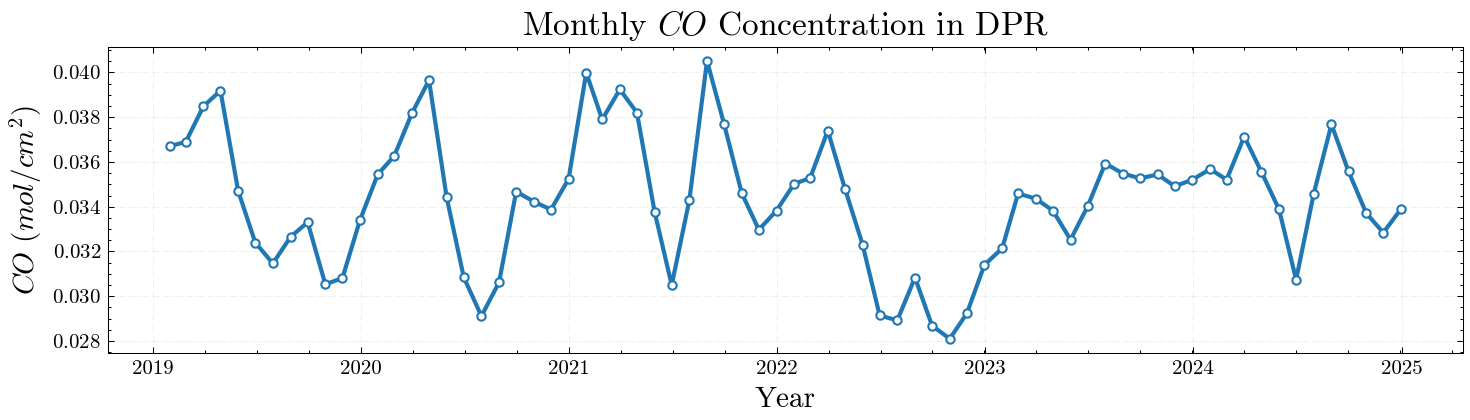

In [102]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(
    monthly_co_df.index,
    monthly_co_df['co'],
    color='tab:blue',
    linestyle='-',
    linewidth=2,
    marker='o',
    markersize=4,
    markerfacecolor='white',
    markeredgecolor='tab:blue',
)

ax.set_title('Monthly $CO$ Concentration in DPR', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('$CO$ ($mol/cm^2$)', fontsize=14)

ax.grid(True, linestyle='-.', alpha=0.2)

ax.legend(fontsize=12)


plt.tight_layout()
plt.show()

<ipython-input-36-28e6d9a33a29>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12)


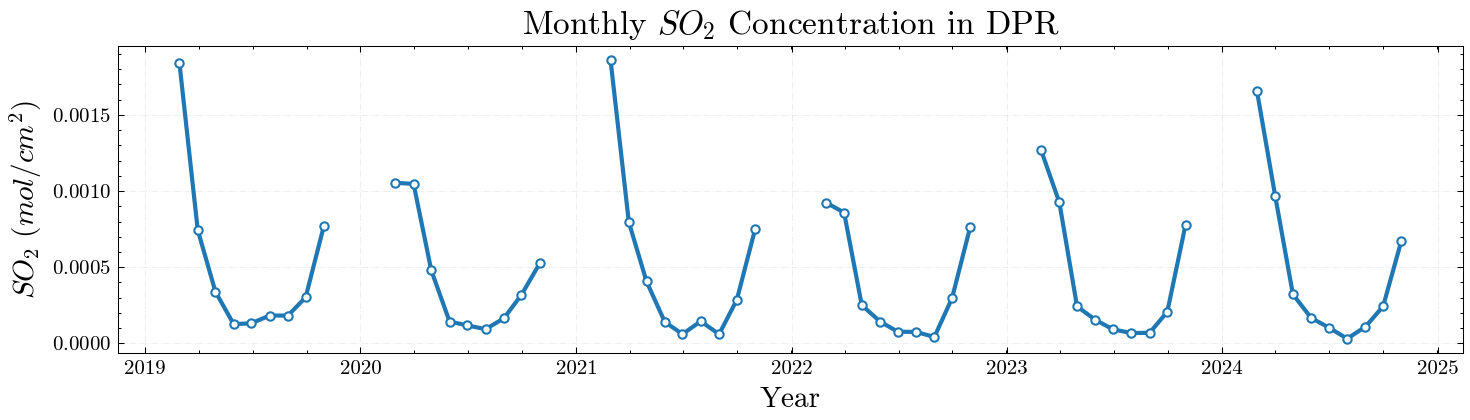

In [36]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(
    monthly_so2_df.index,
    monthly_so2_df['so2'],
    color='tab:blue',
    linestyle='-',
    linewidth=2,
    marker='o',
    markersize=4,
    markerfacecolor='white',
    markeredgecolor='tab:blue',
)

ax.set_title('Monthly $SO_2$ Concentration in DPR', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('$SO_2$ ($mol/cm^2$)', fontsize=14)

ax.grid(True, linestyle='-.', alpha=0.2)

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-37-f96bca791ddc>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12)


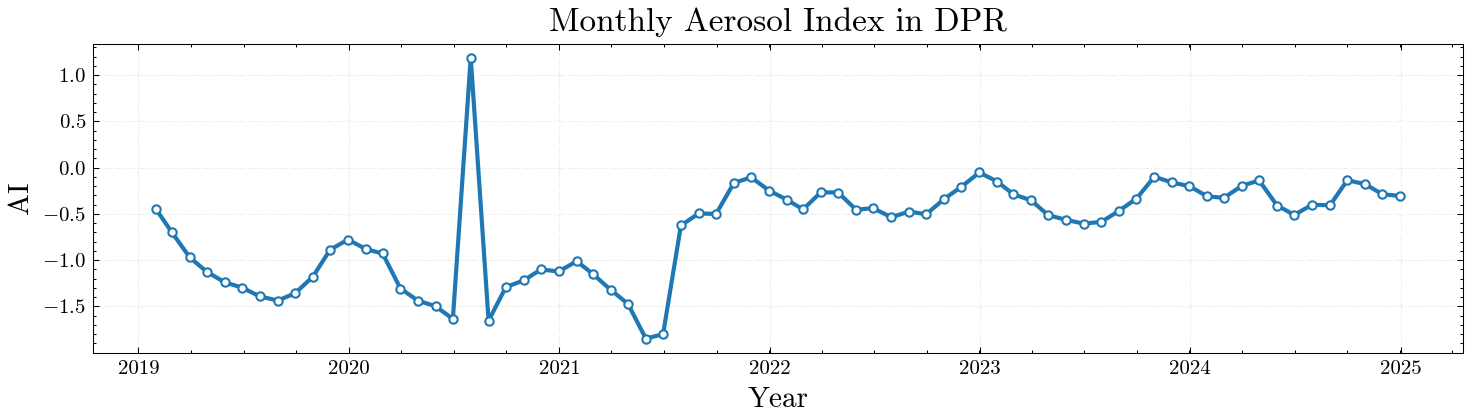

In [37]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(
    monthly_ai_df.index,
    monthly_ai_df['ai'],
    color='tab:blue',
    linestyle='-',
    linewidth=2,
    marker='o',
    markersize=4,
    markerfacecolor='white',
    markeredgecolor='tab:blue',
)

ax.set_title('Monthly Aerosol Index in DPR', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('AI', fontsize=14)

ax.grid(True, linestyle='-.', alpha=0.2)

ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [93]:
seasonal_no2 = monthly_nit.groupby('time.month').mean(dim='time')
seasonal_hcho = monthly_hcho.groupby('time.month').mean(dim='time')
seasonal_o3 = monthly_o3.groupby('time.month').mean(dim='time')
seasonal_so2 = monthly_so2.groupby('time.month').mean(dim='time')
seasonal_co = monthly_co.groupby('time.month').mean(dim='time')
seasonal_ai = monthly_ai.groupby('time.month').mean(dim='time')

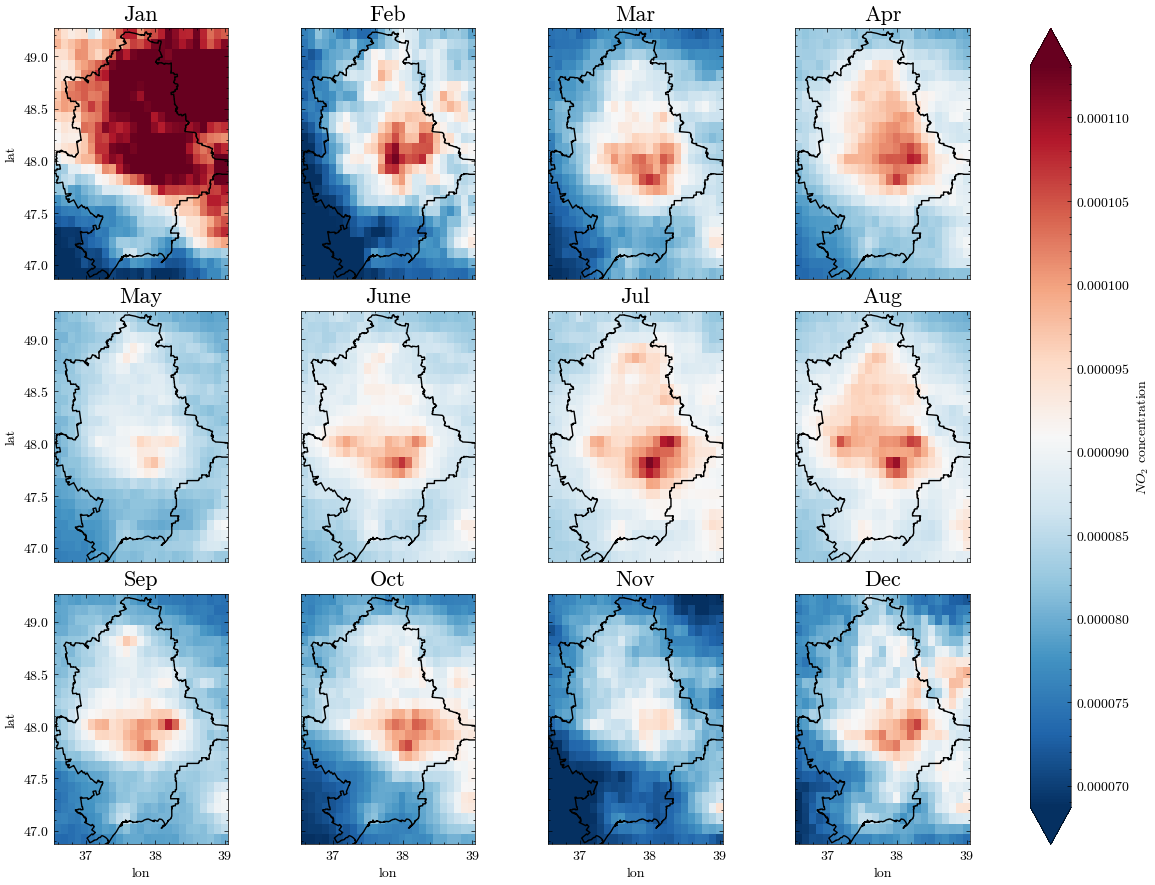

In [94]:
titles = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plot = seasonal_no2.no2.plot(
    x='lon',
    y='lat',
    col='month',
    col_wrap=4,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$NO_2$ concentration'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

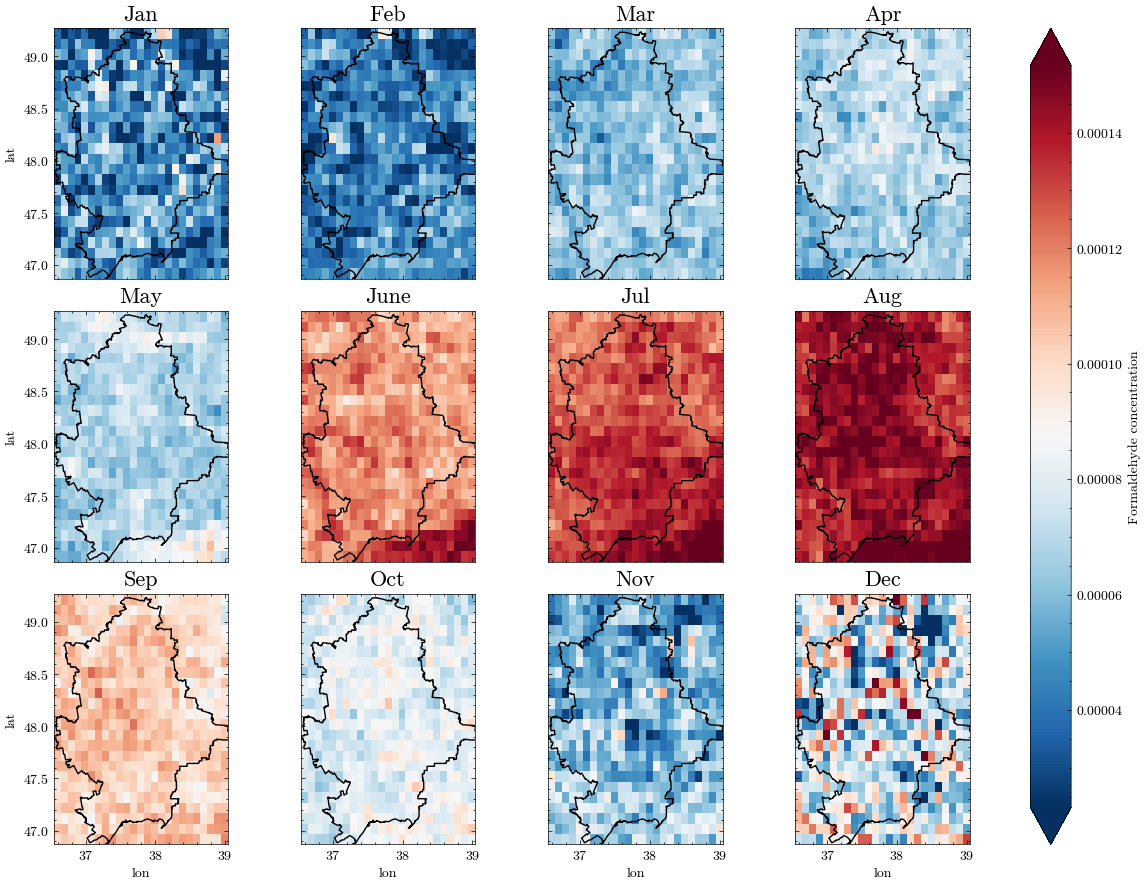

In [53]:
titles = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plot = seasonal_hcho.hcho.plot(
    x='lon',
    y='lat',
    col='month',
    col_wrap=4,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': 'Formaldehyde concentration'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

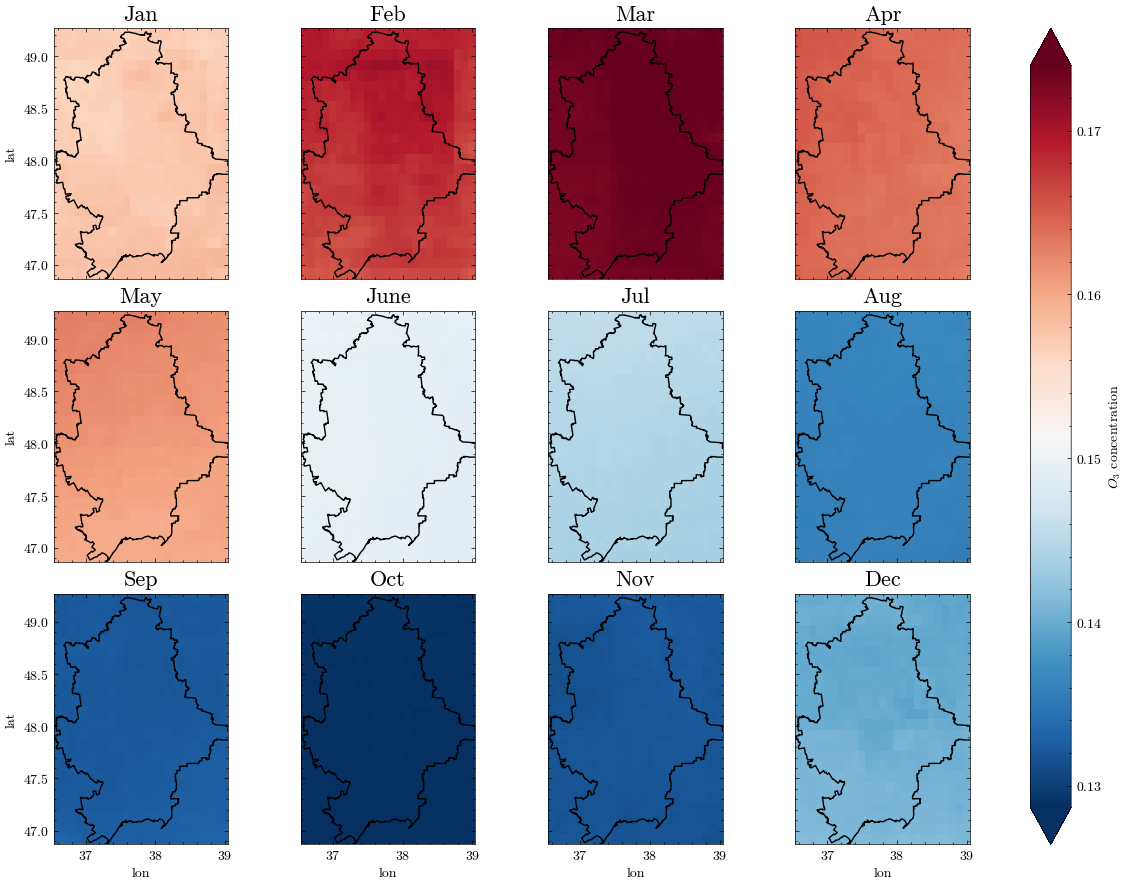

In [54]:
titles = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plot = seasonal_o3.o3.plot(
    x='lon',
    y='lat',
    col='month',
    col_wrap=4,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$O_3$ concentration'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

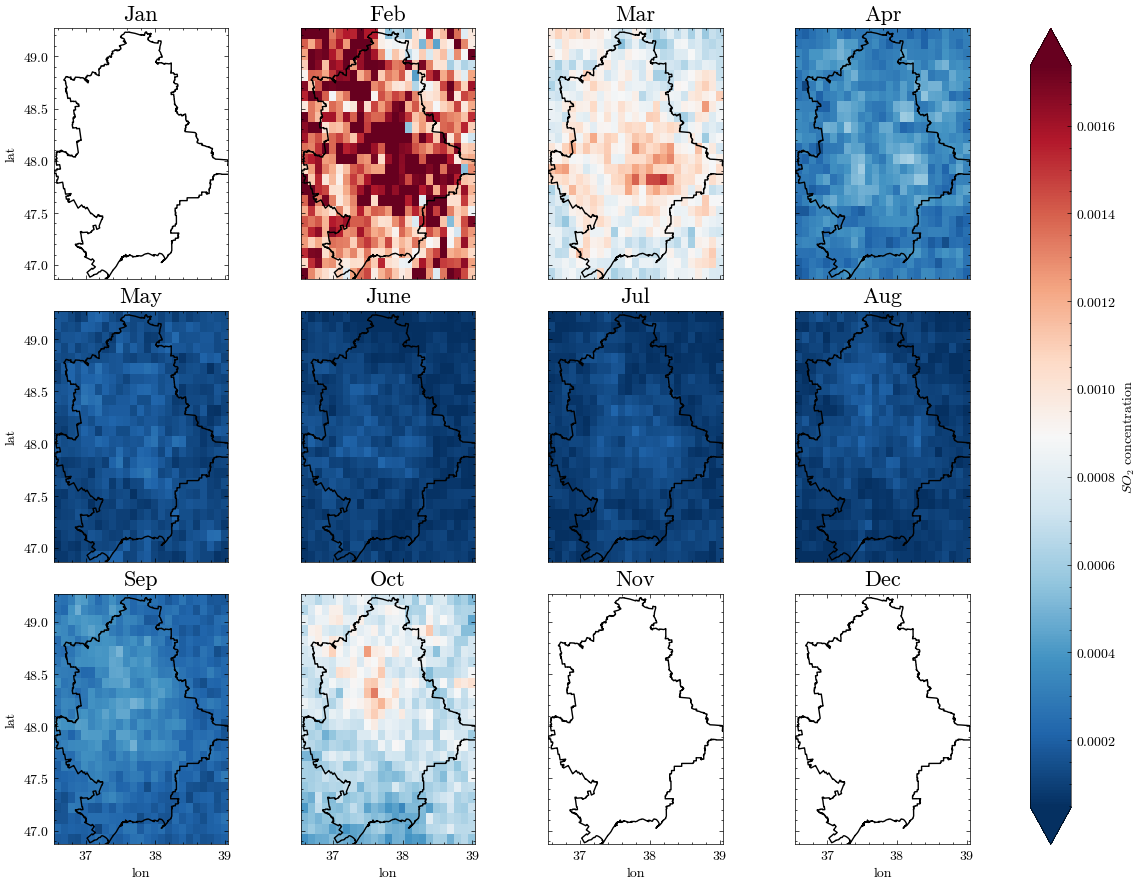

In [55]:
titles = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plot = seasonal_so2.so2.plot(
    x='lon',
    y='lat',
    col='month',
    col_wrap=4,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$SO_2$ concentration'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

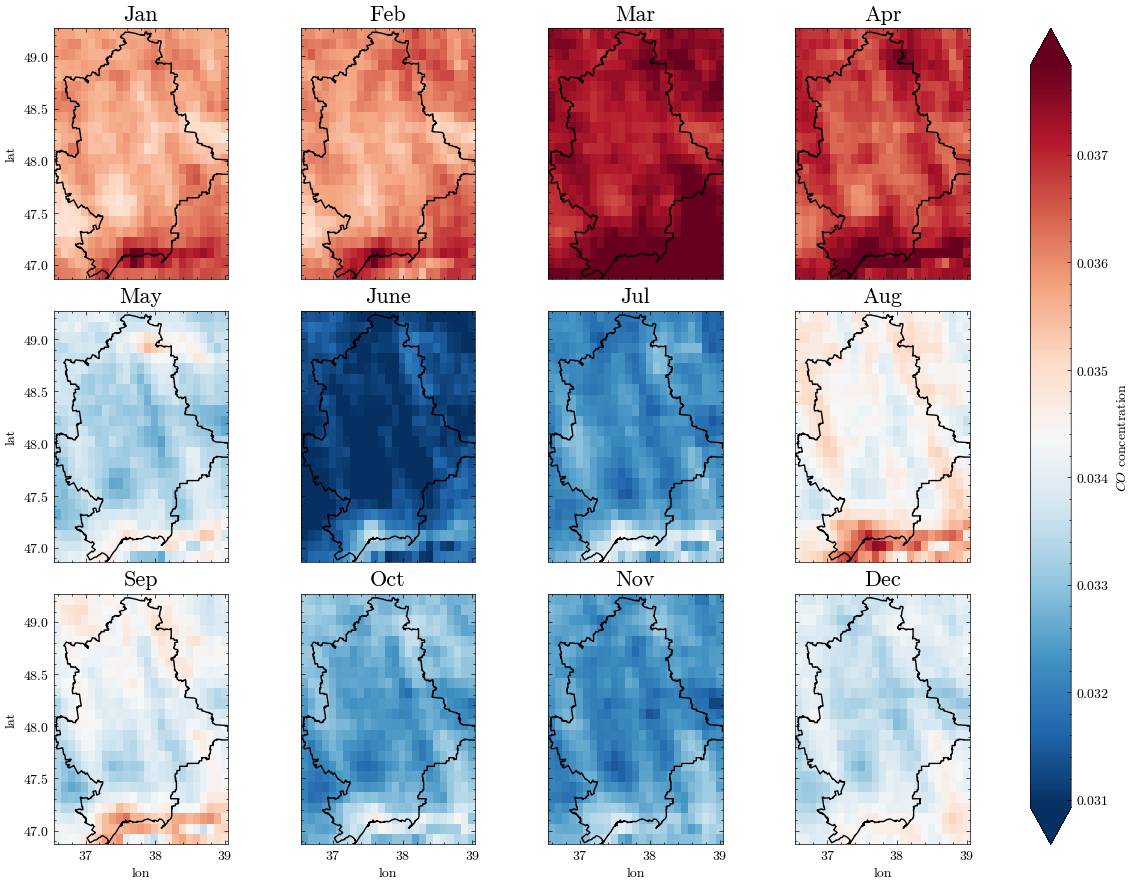

In [56]:
titles = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plot = seasonal_co.co.plot(
    x='lon',
    y='lat',
    col='month',
    col_wrap=4,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': '$CO$ concentration'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

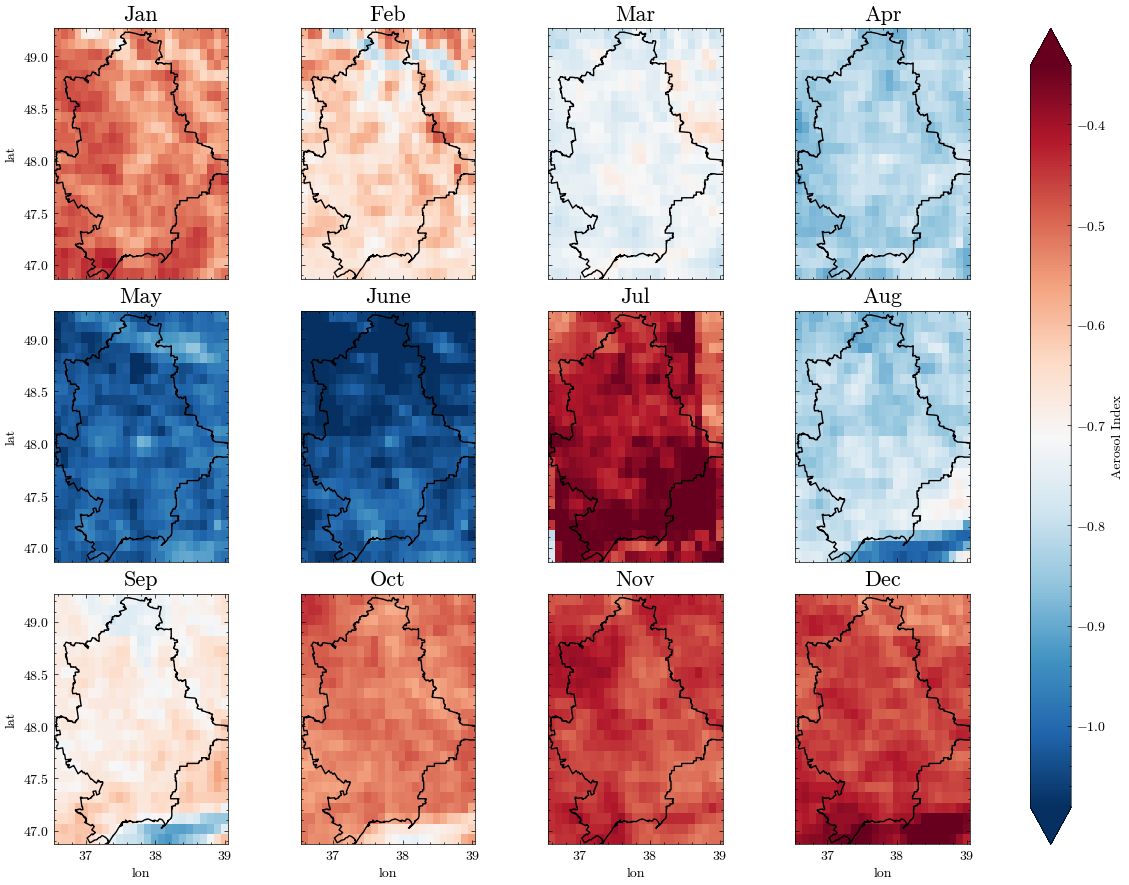

In [57]:
titles = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plot = seasonal_ai.ai.plot(
    x='lon',
    y='lat',
    col='month',
    col_wrap=4,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': 'Aerosol Index'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

In [58]:
seasonal_nit = monthly_nit_df.groupby(monthly_nit_df.index.month).mean()
seasonal_hcho = monthly_hcho_df.groupby(monthly_hcho_df.index.month).mean()
seasonal_o3 = monthly_o3_df.groupby(monthly_o3_df.index.month).mean()
seasonal_so2 = monthly_so2_df.groupby(monthly_so2_df.index.month).mean()
seasonal_co = monthly_co_df.groupby(monthly_co_df.index.month).mean()
seasonal_ai = monthly_ai_df.groupby(monthly_ai_df.index.month).mean()

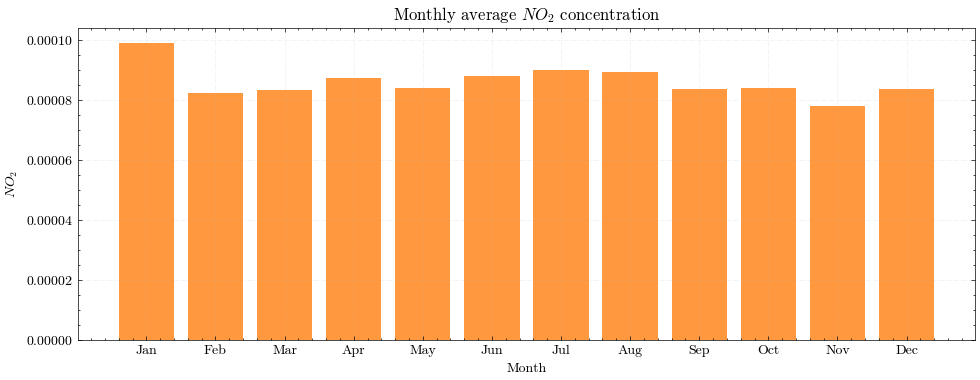

In [59]:
plt.figure(figsize=(10, 4))
plt.bar(seasonal_nit.index, seasonal_nit['no2'], color='tab:orange', alpha=0.8)
plt.title('Monthly average $NO_2$ concentration')
plt.xlabel('Month')
plt.ylabel('$NO_2$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='-.', alpha=0.2)
plt.tight_layout()
plt.show()

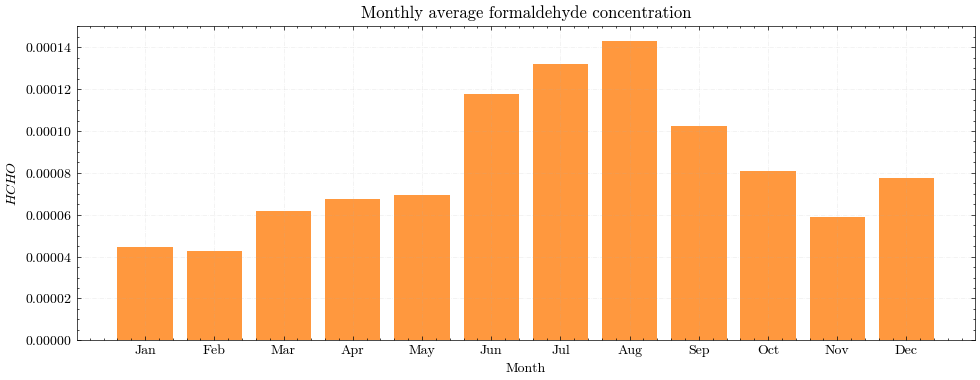

In [60]:
plt.figure(figsize=(10, 4))
plt.bar(seasonal_hcho.index, seasonal_hcho['hcho'], color='tab:orange', alpha=0.8)
plt.title('Monthly average formaldehyde concentration')
plt.xlabel('Month')
plt.ylabel('$HCHO$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='-.', alpha=0.2)
plt.tight_layout()
plt.show()

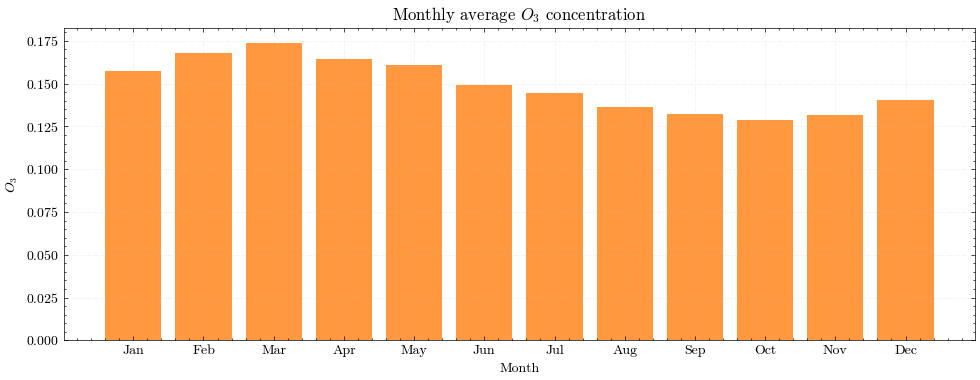

In [61]:
plt.figure(figsize=(10, 4))
plt.bar(seasonal_o3.index, seasonal_o3['o3'], color='tab:orange', alpha=0.8)
plt.title('Monthly average $O_3$ concentration')
plt.xlabel('Month')
plt.ylabel('$O_3$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='-.', alpha=0.2)
plt.tight_layout()
plt.show()

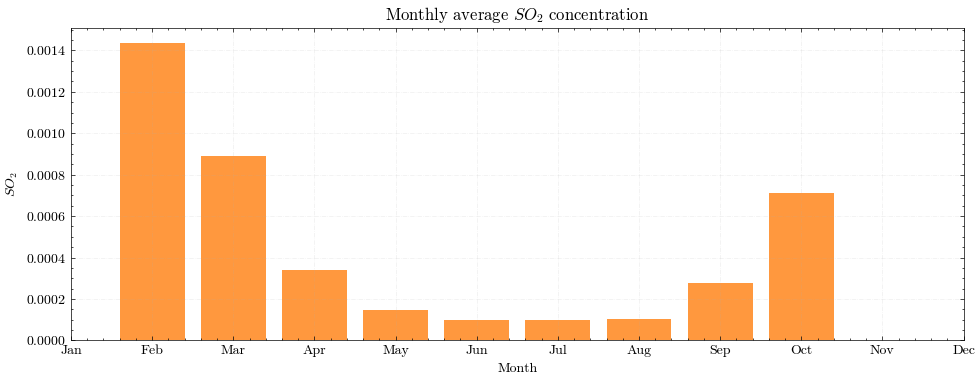

In [62]:
plt.figure(figsize=(10, 4))
plt.bar(seasonal_so2.index, seasonal_so2['so2'], color='tab:orange', alpha=0.8)
plt.title('Monthly average $SO_2$ concentration')
plt.xlabel('Month')
plt.ylabel('$SO_2$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='-.', alpha=0.2)
plt.tight_layout()
plt.show()

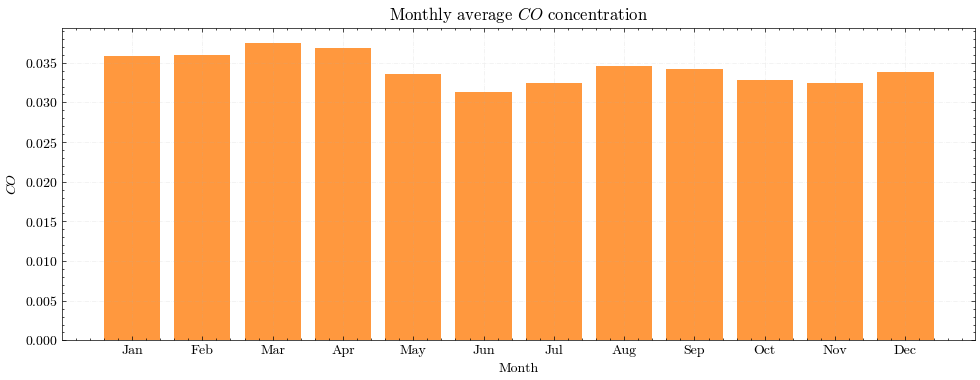

In [63]:
plt.figure(figsize=(10, 4))
plt.bar(seasonal_co.index, seasonal_co['co'], color='tab:orange', alpha=0.8)
plt.title('Monthly average $CO$ concentration')
plt.xlabel('Month')
plt.ylabel('$CO$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='-.', alpha=0.2)
plt.tight_layout()
plt.show()

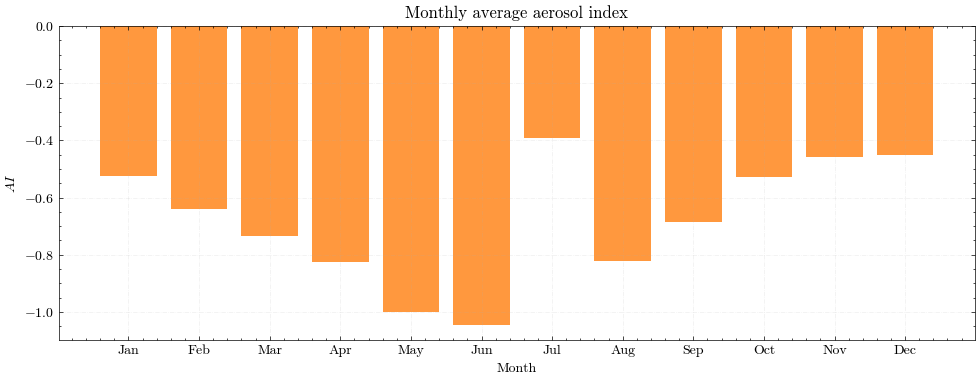

In [64]:
plt.figure(figsize=(10, 4))
plt.bar(seasonal_ai.index, seasonal_ai['ai'], color='tab:orange', alpha=0.8)
plt.title('Monthly average aerosol index')
plt.xlabel('Month')
plt.ylabel('$AI$')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='-.', alpha=0.2)
plt.tight_layout()
plt.show()

In [79]:
annual_no2_d = annual_no2['no2']
annual_hcho_d = annual_hcho['hcho']
annual_o3_d = annual_o3['o3']
annual_so2_d = annual_so2['so2']
annual_co_d = annual_co['co']


pdk = {
    'no2': 4e-16 * 1e4,
    'hcho': 2e-16 * 1e4,
    'o3': 6e-16 * 1e4,
    'so2': 5e-16 * 1e4,
    'co': 1e-17 * 1e4
}

c_i = {
    'no2': 3,
    'hcho': 2,
    'o3': 2,
    'so2': 3,
    'co': 1
}

ds = xr.Dataset({
    'no2': annual_no2_d,
    'hcho': annual_hcho_d,
    'o3': annual_o3_d,
    'so2': annual_so2_d,
    'co': annual_co_d
})

partial_indices = []
for pollutant in ['no2', 'hcho', 'o3', 'so2', 'co']:
    da = ds[pollutant]
    pdk_val = pdk[pollutant]
    c_val = c_i[pollutant]


    partial = (da / pdk_val) * c_val


    partial = partial.where(da > pdk_val, 0)
    partial.name = pollutant
    partial_indices.append(partial)


all_partials = xr.concat(partial_indices, dim='pollutant')


ranked = all_partials.rank(dim='pollutant')


num_pollutants = len(partial_indices)
top_mask = ranked >= num_pollutants - 5 + 1


iza = all_partials.where(top_mask).sum(dim='pollutant')

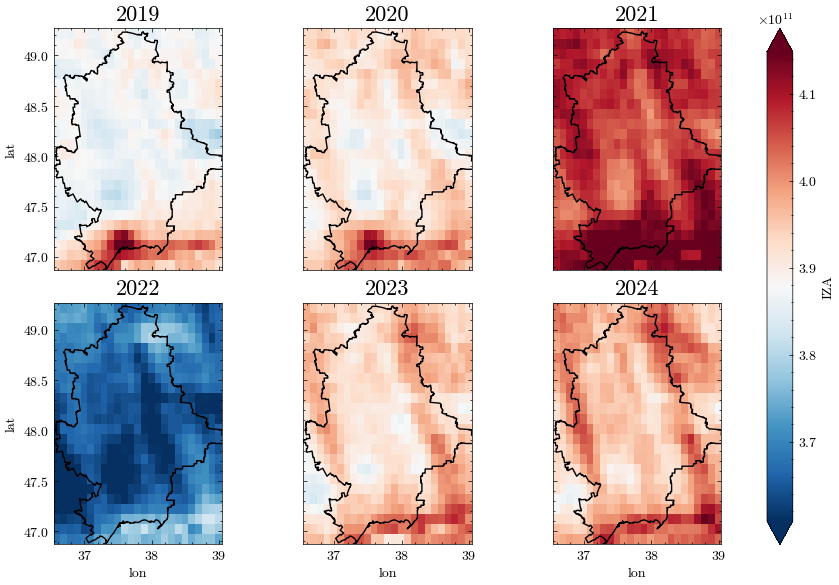

In [80]:
titles = ["2019", "2020", "2021", "2022", "2023", "2024"]

plot = iza.plot(
    x='lon',
    y='lat',
    col='time',
    col_wrap=3,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': 'IZA'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()

In [97]:
seasonal_no2_d = seasonal_no2['no2']
seasonal_hcho_d = seasonal_hcho['hcho']
seasonal_o3_d = seasonal_o3['o3']
seasonal_so2_d = seasonal_so2['so2']
seasonal_co_d = seasonal_co['co']


pdk = {
    'no2': 4e-16 * 1e4,
    'hcho': 2e-16 * 1e4,
    'o3': 6e-16 * 1e4,
    'so2': 5e-16 * 1e4,
    'co': 1e-17 * 1e4
}

c_i = {
    'no2': 3,
    'hcho': 2,
    'o3': 2,
    'so2': 3,
    'co': 1
}

ds_s = xr.Dataset({
    'no2': seasonal_no2_d,
    'hcho': seasonal_hcho_d,
    'o3': seasonal_o3_d,
    'so2': seasonal_so2_d,
    'co': seasonal_co_d
})

partial_indices_s = []
for pollutant in ['no2', 'hcho', 'o3', 'so2', 'co']:
    da_s = ds_s[pollutant]
    pdk_val = pdk[pollutant]
    c_val = c_i[pollutant]


    partial_s = (da_s / pdk_val) * c_val

    partial_s = partial_s.where(da_s > pdk_val, 0)
    partial_s.name = pollutant
    partial_indices_s.append(partial_s)


all_partials_s = xr.concat(partial_indices_s, dim='pollutant')


ranked_s = all_partials_s.rank(dim='pollutant')


num_pollutants_s = len(partial_indices_s)
top_mask_s = ranked_s >= num_pollutants_s - 5 + 1


iza_s = all_partials_s.where(top_mask_s).sum(dim='pollutant')

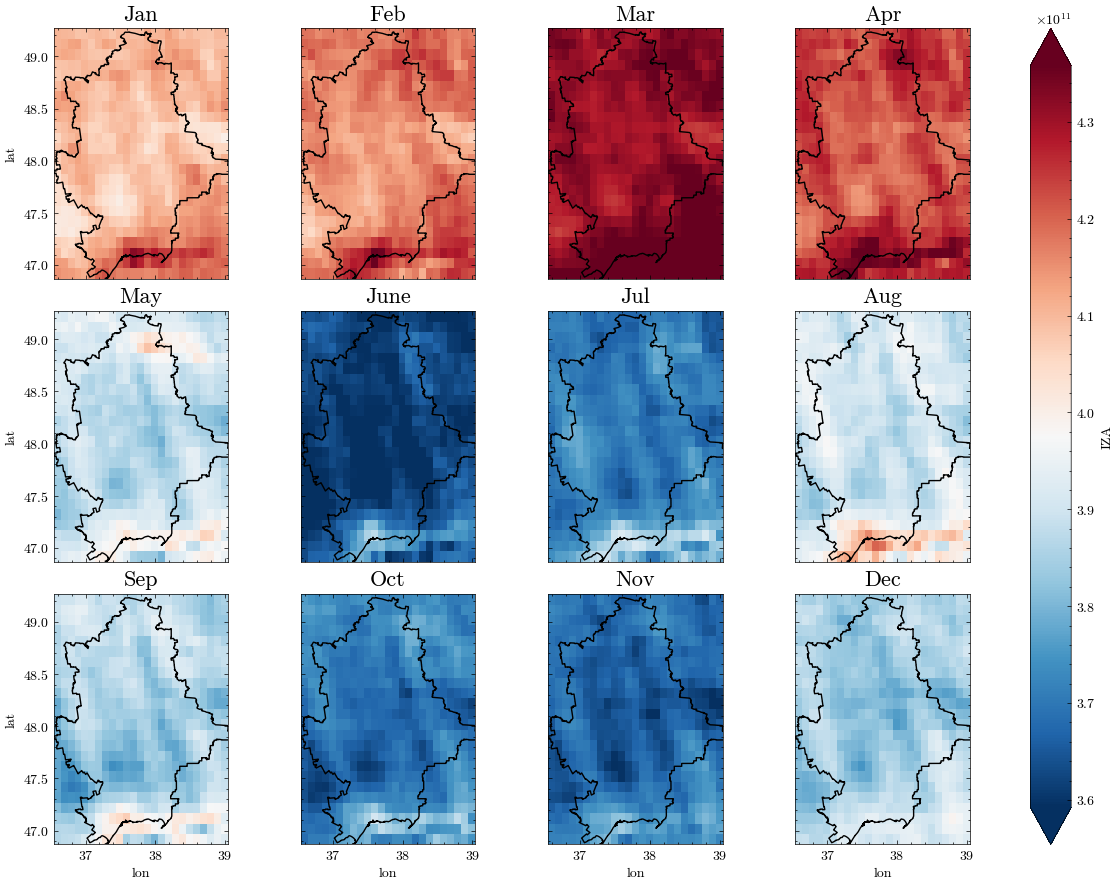

In [99]:
titles = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plot = iza_s.plot(
    x='lon',
    y='lat',
    col='month',
    col_wrap=4,
    robust=True,
    cmap="RdBu_r",
    cbar_kwargs={'label': 'IZA'}
)

for ax in plot.axs.flat:
    roi_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=1)
for ax, title in zip(plot.axs.flat, titles):
    ax.set_title(title, fontsize=16)
plt.show()